In [0]:
import numpy as np
class1 = np.array([[0.75, 0.75], [1, 1], [1.25, 1.5]])
class2 = np.array([[0, 1], [0.25, 1.75], [1, 2], [1.75, 1.75], [2, 1], [1.75, 0], [1, 0], [0.25, 0.25]])

#class1.shape, class2.shape

In [0]:
x_class = np.concatenate((class1,class2),axis=0)
x_power = np.power(x_class,2)
x = np.concatenate((x_power, x_class),axis=1)

#x_class, x_power
#x.shape, x

In [27]:
w = np.zeros(4)
target = np.array([1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])
b = 0
threshold = 0.1
alfa = 0.2
epochs = 0
for epochs in range (80):
  for i in range (0, 11, 1):
    net = np.matmul(w, x[i]) + b
    if net > threshold:
      predict = 1
    elif  net < threshold:
      predict = -1
    else:
      predict = 0
    if predict != target[i]:
      for j in range(0, 4, 1):      
        w[j]   =  w[j] + alfa * target[i] * x[i,j]
      b =  b + alfa * target[i]
    
print("Weights = ",w,", Bias = ",b)

Weights =  [-2.2   -1.525  3.9    2.9  ] , Bias =  -1.9999999999999998


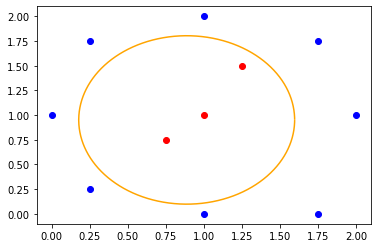

In [28]:
import matplotlib.pyplot as plt

plt.plot(x[target ==  1, 2], x[target ==  1, 3], 'ro')
plt.plot(x[target == -1, 2], x[target == -1, 3], 'bo')

x_line = np.linspace(0, 2, 50000)
delta  = (-w[0]*np.power(x_line+w[2]/(2*w[0]),2)+ np.power(w[2],2)/(4*w[0]) + np.power(w[3],2)/(4*w[1]) - b)/w[1]
x_line = x_line[delta > 0]
delta  = delta [delta > 0]
y_line_p =  np.sqrt (delta) - w[3]/(2*w[1])
y_line_n = -np.sqrt (delta) - w[3]/(2*w[1])
plt.plot(x_line, y_line_p, 'orange')
plt.plot(x_line, y_line_n, 'orange')
plt.show()
